<div class="alert alert-success">
        <h1 align="center" style="color:chocolate;">Regression with a Flood Prediction Dataset
</h1>  
     
</div>

![Flood-Resilience-in-Agriculture-Safeguarding-the-Food-Supply-Chain-Amidst-Climate-Change-blog-1024x574.png](attachment:3e5fa090-2f6b-4d14-aa4b-724882b46d98.png)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Competition :</font></h3>
    
**Task**: The objective of the task is to predict the FloodProbability for each row in the test dataset. In other words, given the features provided in the test dataset, the goal is to build a predictive model that can accurately estimate the probability of flooding..

**Dataset**: The dataset is derived from the Flood Prediction Factors dataset.
Features in this dataset are similar to the original but not exactly the same.
It's recommended to use the original dataset for comparison and to explore differences.
The target variable is FloodProbability..

**Exploration**: Explore differences between this dataset and the original Flood Prediction Factors dataset.
Investigate whether incorporating the original dataset into training improves model performance.
Utilize visualization techniques for EDA.
The dataset is suitable for clustering analysis.

**Evaluation**: Submissions are evaluated using the R2 score.

**Submission**: train.csv - the training dataset; FloodProbability is the target
test.csv - the test dataset; your objective is to predict the FloodProbability for each row
sample_submission.csv - a sample submission file in the correct format

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: lightgrey; font-size:100%; text-align:left">

<h3 align="center"><font color='black'>💡 Evalaution Metric :</font></h3>
    
    
    
![1_D9wPS2odLYsNOvOLffOMCw.png](attachment:9c845e0f-311b-487a-9607-e92264957d7a.png)
    




<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Importing Libraries</h1>  
     
</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Packages :</font></h3>
    
🎭we are Importing several Python packages u
    
🧨 Sklearn have,Kfold, mean_squared_error, mean_absolute_error, median_absolute_error.


🥽 XGBoost (eXtreme Gradient Boosting) and LightGBM are both powerful machine learning algorithms used for supervised learning tasks, particularly in the realm of gradient boosting

    
🎍Numpy, Pandas, Matplotlib, Seaborn :NumPy for numerical computing, Pandas for data manipulation, Matplotlib for plotting, and Seaborn for statistical visualization.
    



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from matplotlib.patches import ConnectionPatch

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
df_test  = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')
df_sub = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')

In [ ]:
df_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [ ]:
df_train.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [ ]:
df_test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [ ]:
df_sub.head()

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5


<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Checking Collinearity</h1>  
     
</div>

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


df_train_with_const = add_constant(df_train)


vif_data = pd.DataFrame()
vif_data["feature"] = df_train_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_train_with_const.values, i) for i in range(df_train_with_const.shape[1])]

print(vif_data)

                            feature         VIF
0                             const  152.517829
1                                id    1.000011
2                  MonsoonIntensity    1.331574
3                TopographyDrainage    1.348860
4                   RiverManagement    1.343868
5                     Deforestation    1.338782
6                      Urbanization    1.347294
7                     ClimateChange    1.338716
8                       DamsQuality    1.346030
9                         Siltation    1.338225
10            AgriculturalPractices    1.339117
11                    Encroachments    1.346542
12  IneffectiveDisasterPreparedness    1.343053
13                  DrainageSystems    1.340917
14             CoastalVulnerability    1.351291
15                       Landslides    1.343013
16                       Watersheds    1.345418
17      DeterioratingInfrastructure    1.334803
18                  PopulationScore    1.346067
19                      WetlandLoss    1

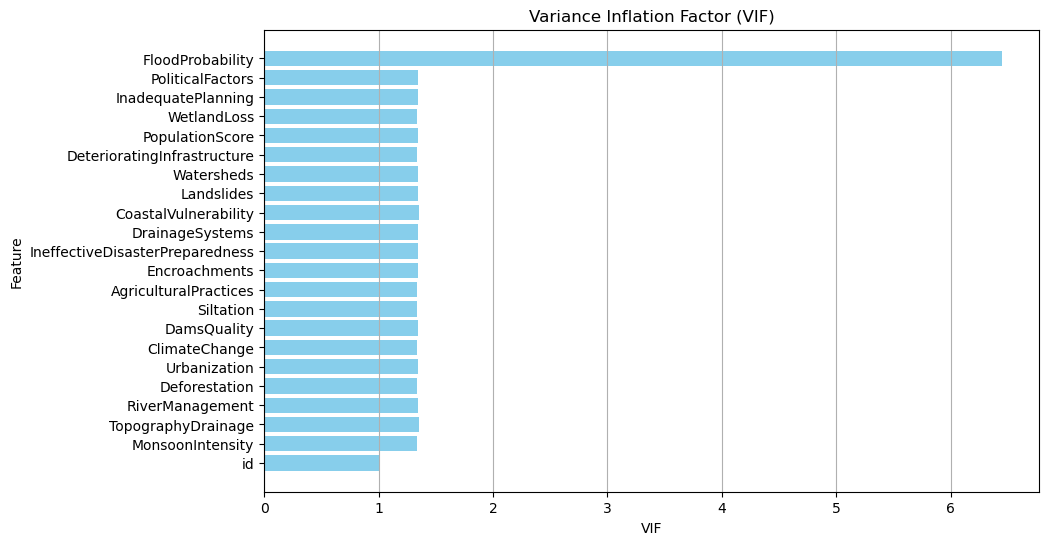

In [ ]:
vif_data = vif_data[vif_data['feature'] != 'const']
plt.figure(figsize=(10, 6))
plt.barh(vif_data['feature'], vif_data['VIF'], color='skyblue')
plt.xlabel('VIF')
plt.ylabel('Feature')
plt.title('Variance Inflation Factor (VIF)')
plt.grid(axis='x')
plt.show()

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">⚠🍜Exploratory Data Analysis♒🌊</h1>  
     
</div>

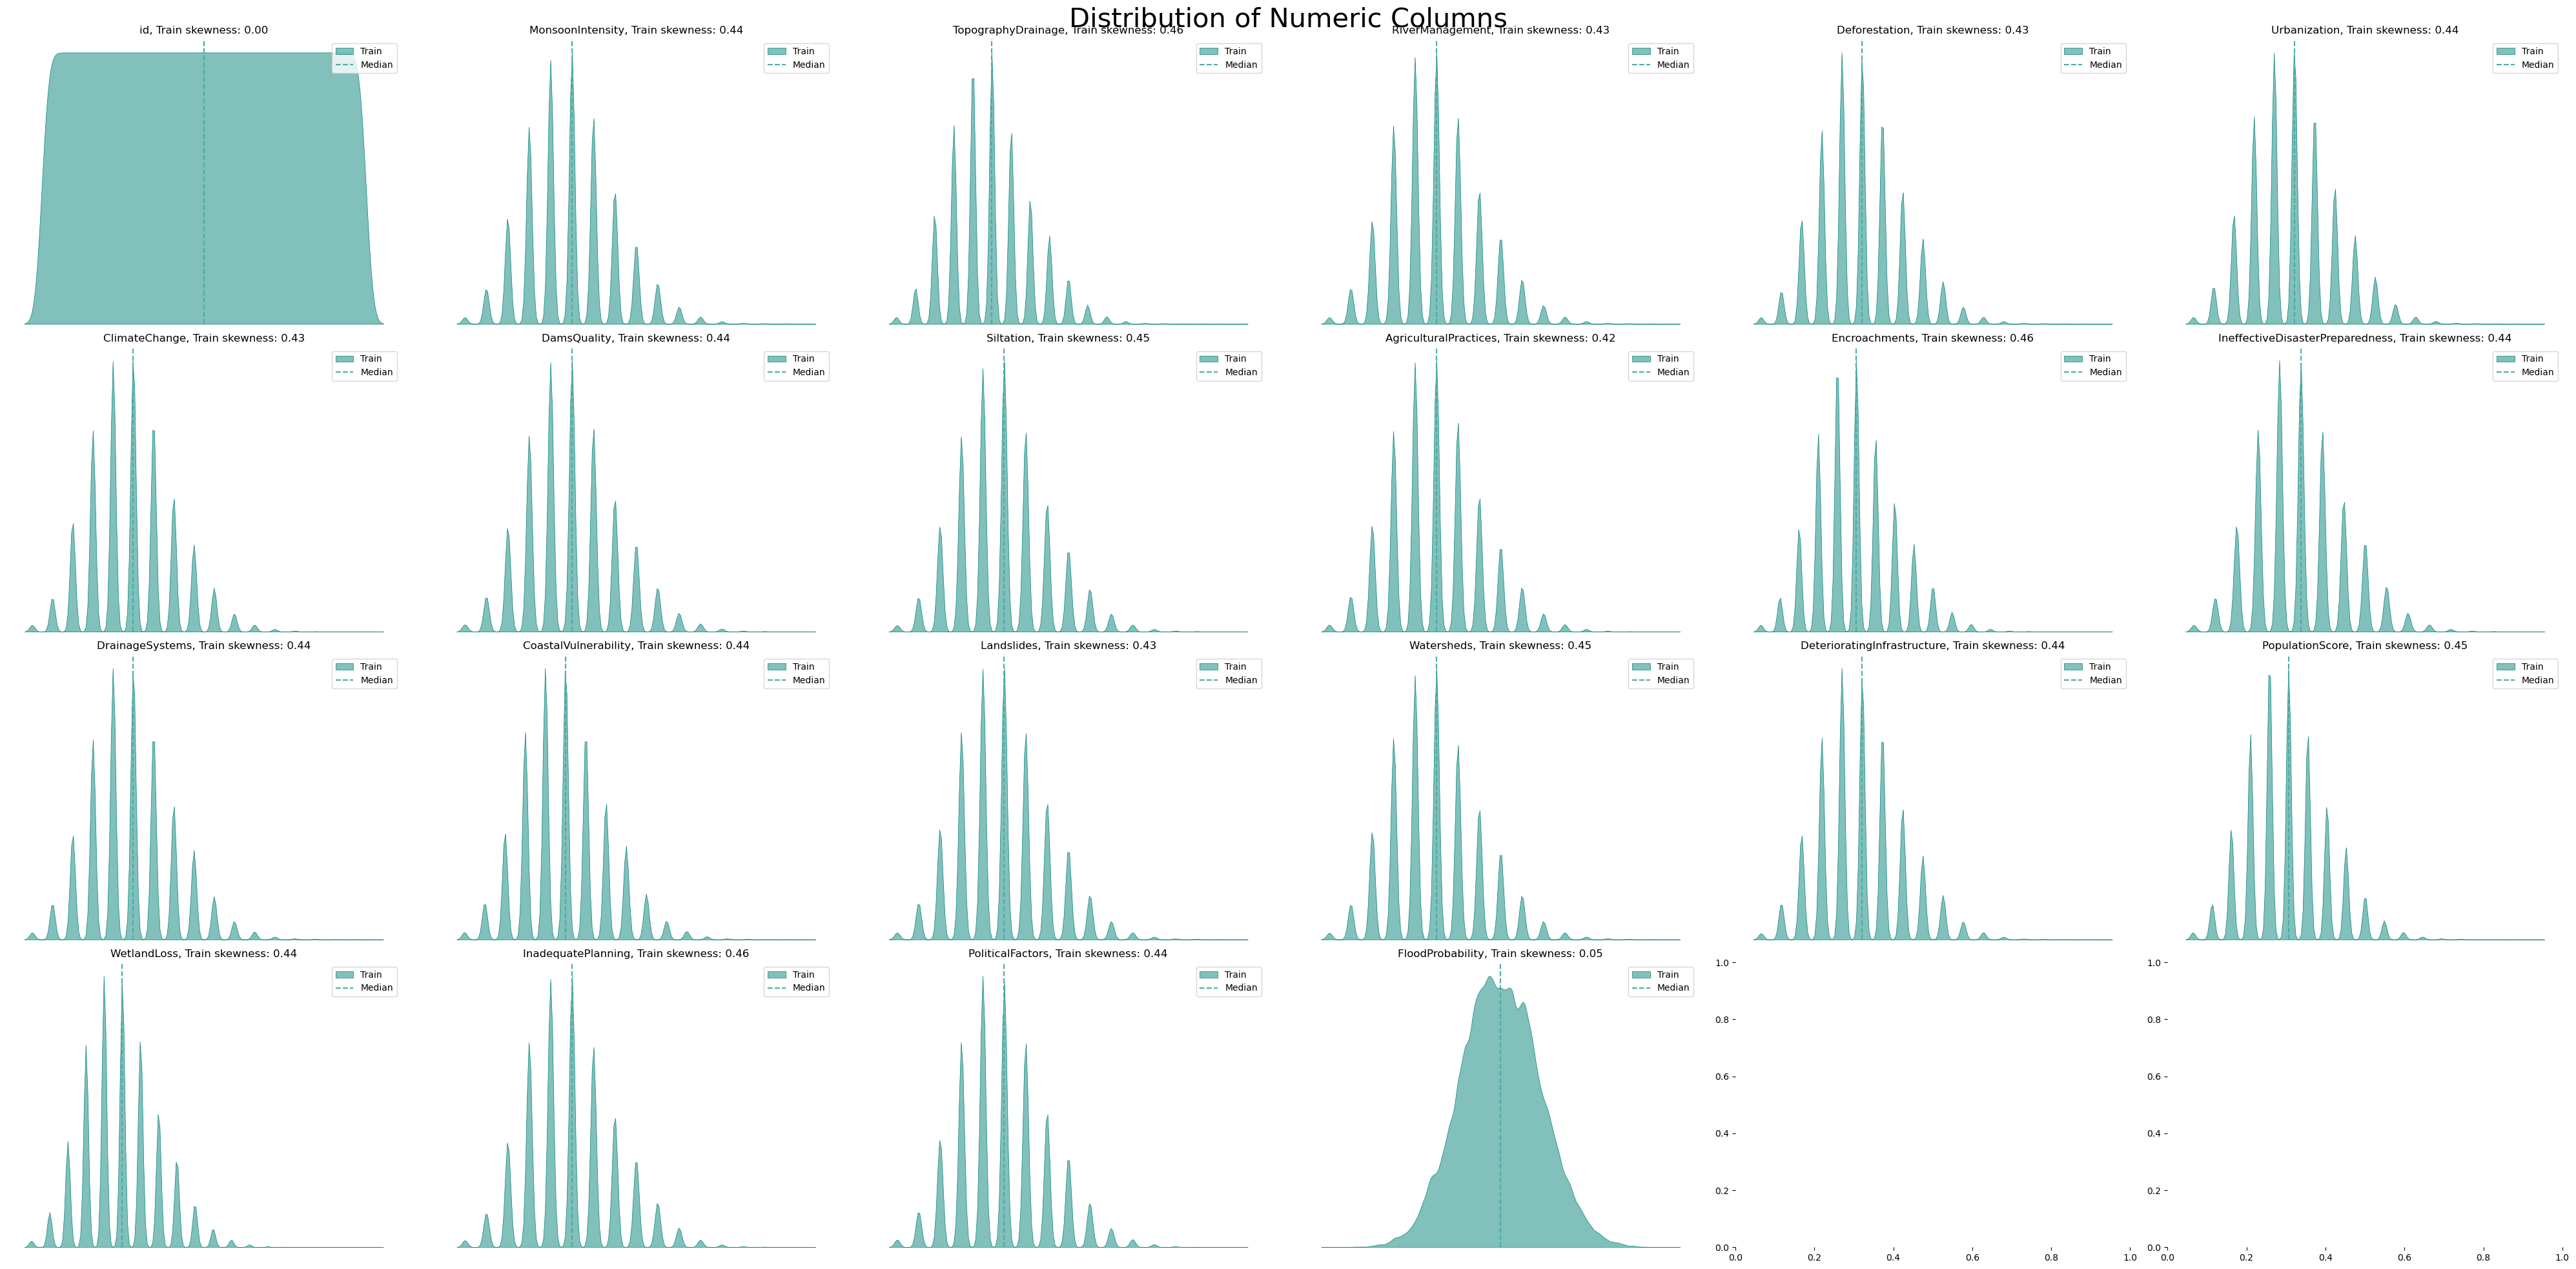

In [ ]:
numeric_columns = df_train.select_dtypes(include=['float64', 'int64'])

def dist(train_dataset, columns_list, rows, cols):
    fig, axs = plt.subplots(rows, cols, figsize=(40, 20))
    axs = axs.flatten()
    for i, col in enumerate(columns_list):
        sns.kdeplot(train_dataset[col], ax=axs[i], fill=True, alpha=0.5, linewidth=0.5, color='#058279', label='Train')
        axs[i].set_title(f'{col}, Train skewness: {train_dataset[col].skew():.2f}')
        axs[i].legend()
        axs[i].axis('off')
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        median_train = train_dataset[col].median()
        axs[i].axvline(x=median_train, color='#4caba4', linestyle='--')
        axs[i].legend(labels=['Train', 'Median'])

    fig.suptitle('Distribution of Numeric Columns', fontsize=30)
    plt.tight_layout()
    sns.despine(left=True, bottom=True)

dist(train_dataset=df_train, columns_list=numeric_columns.columns, rows=4, cols=6)


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


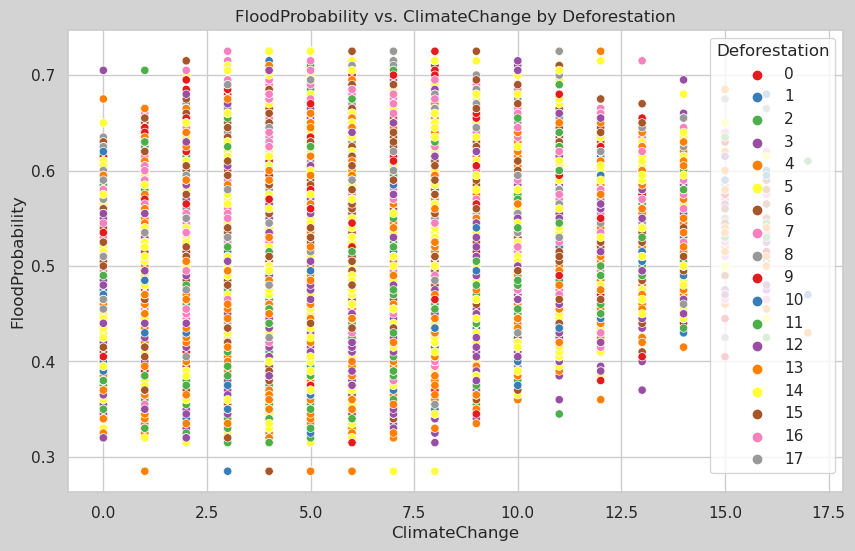

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='ClimateChange', y='FloodProbability', hue='Deforestation', palette='Set1')
plt.title('FloodProbability vs. ClimateChange by Deforestation')
plt.xlabel('ClimateChange')
plt.ylabel('FloodProbability')
plt.legend(title='Deforestation')
plt.gcf().set_facecolor('lightgrey')
plt.show()

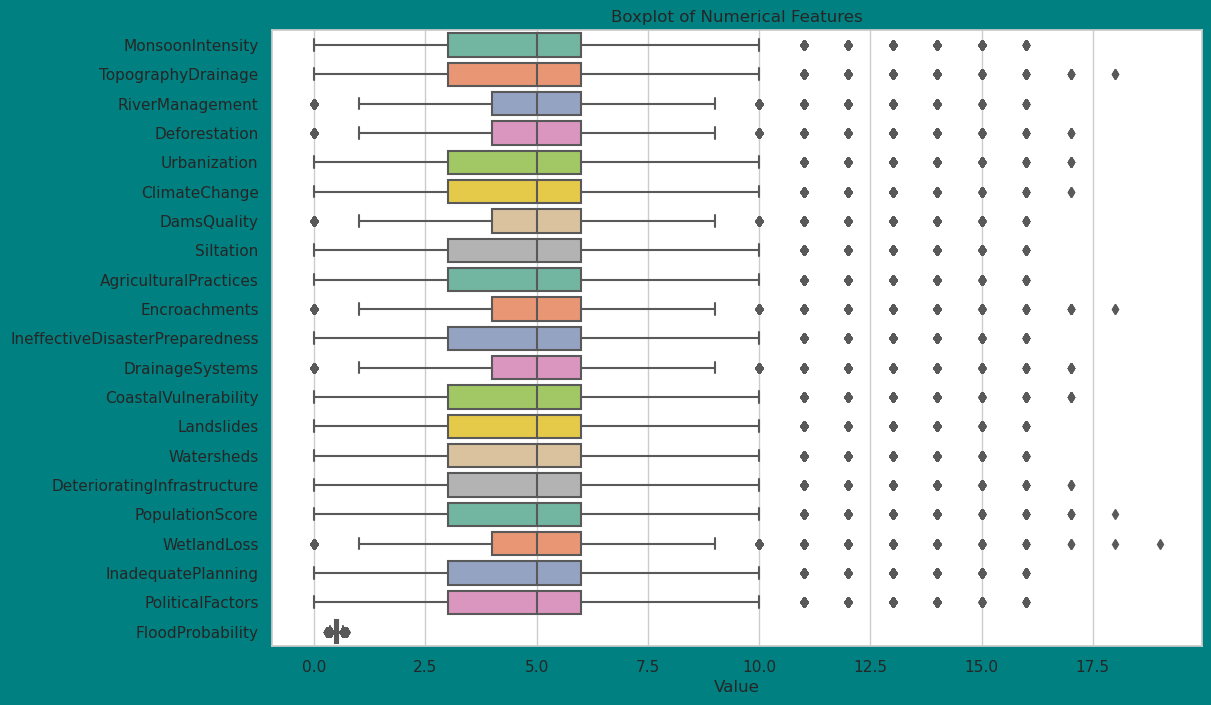

In [ ]:
numeric_features = df_train.select_dtypes(include=['int64', 'float64']).columns.drop('id')
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train[numeric_features], orient="h", palette="Set2")
plt.title('Boxplot of Numerical Features')
plt.xlabel('Value')
plt.gcf().set_facecolor('#008080')
plt.show()

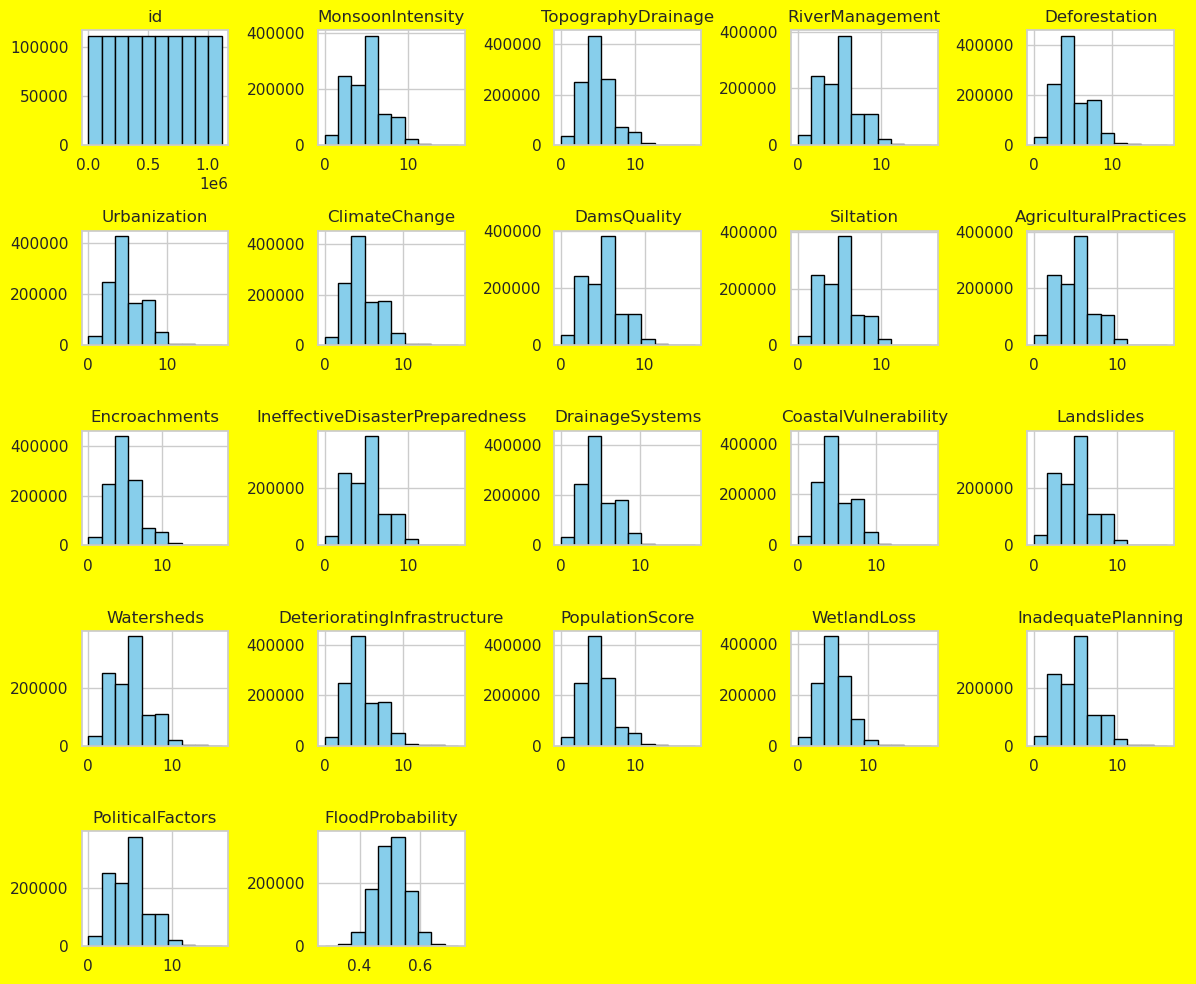

In [ ]:
df_train.hist(figsize=(12, 10), color='skyblue', edgecolor='black')
plt.gcf().set_facecolor('yellow')
plt.tight_layout()
plt.show()

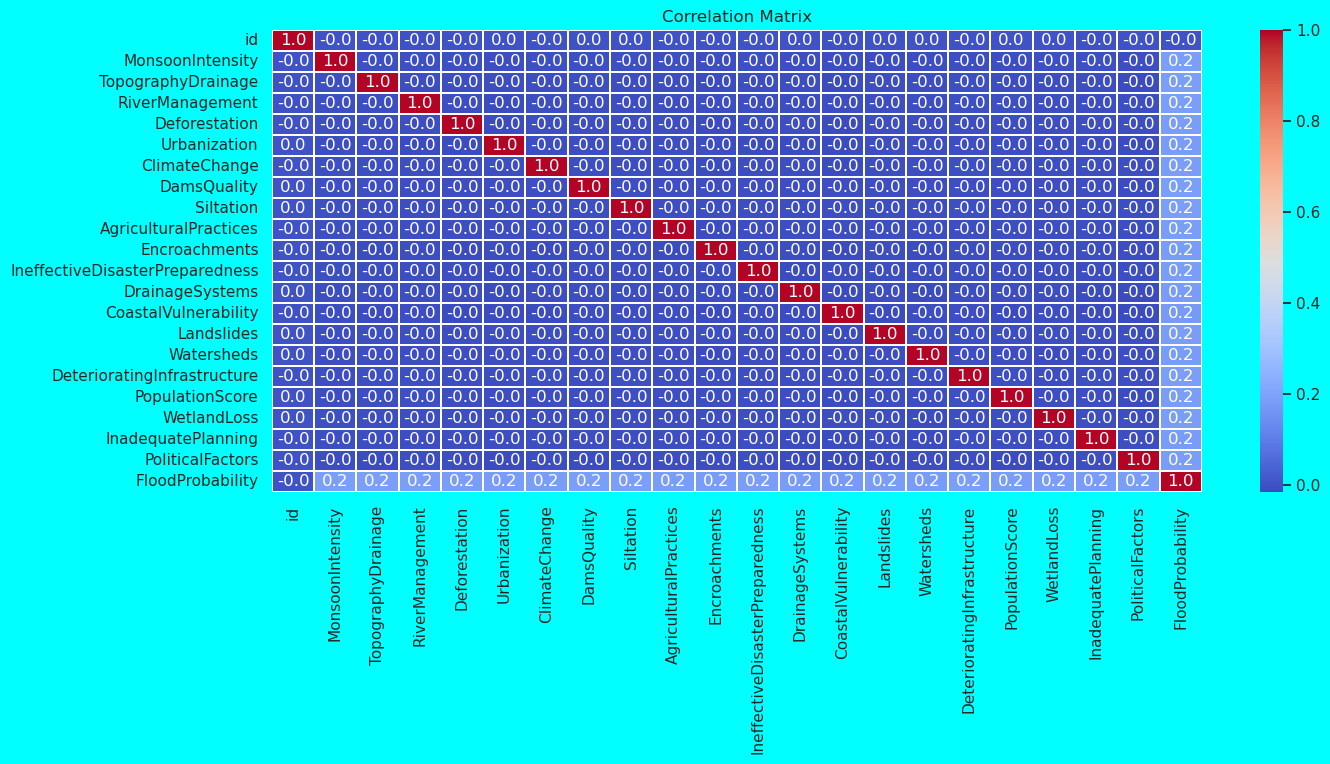

In [ ]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.2)
plt.gcf().set_facecolor('#00FFFF')
plt.title('Correlation Matrix')
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 Observation from above plot :</font></h3>
    
    
**Data Type and Count:** The dataset **consists of 21 columns, with 20 features (all integers)** and 1 target variable (float64).T**here are 1,117,957 entries** in the dataset.
    
**Summary Statistics:**  The **mean FloodProbability is approximately 0.504**, with **a median of 0.505**.FloodProbability ranges from **0.285 to 0.725**, with a **standard deviation of 0.051**.The **skewness is positive (0.047)**, indicating a **slight right-skewed distribution**.**Kurtosis is negative (-0.039), suggesting the distribution has lighter tails than a normal distribution**.
    
**Feature Distributions:**  All **features exhibit similar distributions**, **with mean and median values around 5**.The standard **deviation for features ranges from approximately 2.05 to 2.09**.There are **no apparent missing values** in any of the features, as indicated by the consistent non-null counts across all columns.
    
**Feature Relationships:**
There is **no noticeable correlation among the features**, as indicated by their **low skewness and kurtosis values**.
However, all **features demonstrate correlations with the target variable (FloodProbability)**, suggesting their potential relevance in predicting flood probabilities.
    

In [ ]:
df_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [ ]:
df_train = pd.read_csv('/kaggle/input/flood-analysis-feature-data/train_flood.csv')
df_test  = pd.read_csv('/kaggle/input/flood-analysis-feature-data/test_flood.csv')

In [ ]:
df_train.drop(columns=['id'], inplace=True)
df_test.drop(columns=['id'], inplace=True)

In [ ]:
df_test.isnull().sum()

MonsoonIntensity      0
TopographyDrainage    0
RiverManagement       0
Deforestation         0
Urbanization          0
                     ..
cnt_11                0
cnt_12                0
cnt_13                0
cnt_14                0
cnt_15                0
Length: 68, dtype: int64

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Regression Analysis♒🌊</h1>  
     
</div>

In [ ]:
y = df_train['FloodProbability']
df_train = df_train.drop(['FloodProbability'],axis=1)
X = df_train

This Part of code is taken from here Thank u CARL, https://www.kaggle.com/code/carlmcbrideellis/automl-grand-prix-cme-catboost-baseline-5/notebook

In [ ]:
from scipy.stats import entropy
from scipy.signal import welch,find_peaks


def count_peaks(row):
    peaks, _ = find_peaks(row)
    return len(peaks)

def spectral_entropy(row):
    _, psd = welch(row)
    return entropy(psd)

def cleaning(dataset):

    features = dataset.columns.tolist()
    dataset['mean_features'] = 0.1 * dataset[features].mean(axis=1)
    dataset['std_features'] = dataset[features].std(axis=1)
    dataset['max_features'] = dataset[features].max(axis=1)
    dataset['min_features'] = dataset[features].min(axis=1)
    dataset['range_features'] = dataset['max_features'] - dataset['min_features']
    dataset['variance_features'] = dataset[features].var(axis=1)
    dataset['skewness_features'] = dataset[features].skew(axis=1)
    dataset['sum_features'] = dataset[features].sum(axis=1)


    mean_abs_dev = (dataset[features] - dataset[features].mean(axis=1).values.reshape(-1, 1)).abs().mean(axis=1)
    median_abs_dev = (dataset[features] - dataset[features].median(axis=1).values.reshape(-1, 1)).abs().mean(axis=1)
    range_abs_diff = (dataset[features] - dataset[features].median(axis=1).values.reshape(-1, 1)).abs().max(axis=1) - (dataset[features] - dataset[features].median(axis=1).values.reshape(-1, 1)).abs().min(axis=1)
    geometric_mean = np.exp(np.log(dataset[features].replace(0, 1)).mean(axis=1))
    harmonic_mean = len(features) / (1 / dataset[features].replace(0, 1)).sum(axis=1)
    coeff_variation = dataset['std_features'] / dataset['mean_features']


    quartiles = dataset[features].quantile([0.25, 0.5, 0.75], axis=1)
    dataset['first_quartile'] = quartiles.loc[0.25]
    dataset['second_quartile'] = quartiles.loc[0.5]
    dataset['third_quartile'] = quartiles.loc[0.75]


    kurtosis_features = dataset[features].kurtosis(axis=1)
    dataset['kurtosis_features'] = kurtosis_features

    dataset['mean_absolute_deviation'] = mean_abs_dev
    dataset['median_absolute_deviation'] = median_abs_dev
    dataset['range_abs_diff'] = range_abs_diff
    dataset['geometric_mean'] = geometric_mean
    dataset['harmonic_mean'] = harmonic_mean
    dataset['coeff_variation'] = coeff_variation

    #peak_features = dataset[features].apply(count_peaks, axis=1)
    #dataset['peak_frequency'] = peak_features

    #spectral_entropy_features = dataset[features].apply(spectral_entropy, axis=1)
    #dataset['spectral_entropy'] = spectral_entropy_features


    #entropy_features = dataset[features].apply(entropy, axis=1)
    #dataset['entropy'] = entropy_features

    #dataset.drop(features, axis=1, inplace=True)

    return dataset


![1_csk8XTXy0j__hm_kbkwxCw.jpg](attachment:7b70f260-e7b7-4983-a9c1-c990001f6811.jpg)

In [ ]:
#df_train = cleaning(df_train)
#df_test = cleaning(df_test)

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Algorithm Which requires Scaling♒🌊</h1>  
     
</div>

![inbox_2175703_cc4d46b6bb4a14ae085b9db28ad8b8f4_FeatureScaling_ML.jpg](attachment:f76dbffe-c5cb-4d72-8a9a-184c0dd11dc2.jpg)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_data = df_train
scaled_test_data = df_test

In [ ]:
#scaled_train_data = pd.DataFrame(scaled_train_data, columns=df_train.columns)
#scaled_test_data = pd.DataFrame(scaled_test_data, columns=df_test.columns)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from xgboost import XGBRegressor



xgb_params ={'n_estimators':600,
             'max_depth': 10,

             'learning_rate': 0.06,
             'random_state':42,
             }


n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

xgb_predictions = np.zeros(len(scaled_train_data))
xgb_true_labels = np.zeros(len(scaled_train_data))
xgb_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(kf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    xgb_model = XGBRegressor(**xgb_params)

    xgb_model.fit(X_train, y_train,
                  eval_set=[(X_train, y_train), (X_val, y_val)],
                  early_stopping_rounds=10,
                  verbose=100)

    xgb_fold_preds = xgb_model.predict(X_val, ntree_limit=xgb_model.best_ntree_limit)
    xgb_fold_test_preds = xgb_model.predict(scaled_test_data, ntree_limit=xgb_model.best_ntree_limit)

    xgb_predictions[val_idx] = xgb_fold_preds
    xgb_true_labels[val_idx] = y_val
    xgb_test_predictions += xgb_fold_test_preds / n_splits


overall_metric_xgb = r2_score(xgb_true_labels, xgb_predictions)
print("Overall R^2 (XGBRegressor):", overall_metric_xgb)


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:0.04857	validation_1-rmse:0.04852
[89]	validation_0-rmse:0.01796	validation_1-rmse:0.01847


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	validation_0-rmse:0.04855	validation_1-rmse:0.04859
[100]	validation_0-rmse:0.01791	validation_1-rmse:0.01846
[103]	validation_0-rmse:0.01790	validation_1-rmse:0.01846
[0]	validation_0-rmse:0.04855	validation_1-rmse:0.04859
[99]	validation_0-rmse:0.01792	validation_1-rmse:0.01849
[0]	validation_0-rmse:0.04857	validation_1-rmse:0.04850
[100]	validation_0-rmse:0.01793	validation_1-rmse:0.01845
[110]	validation_0-rmse:0.01789	validation_1-rmse:0.01845
[0]	validation_0-rmse:0.04855	validation_1-rmse:0.04860
[96]	validation_0-rmse:0.01794	validation_1-rmse:0.01848
Overall R^2 (XGBRegressor): 0.8689881107770125


<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Plots from results for XGboost♒🌊</h1>  
     
</div>

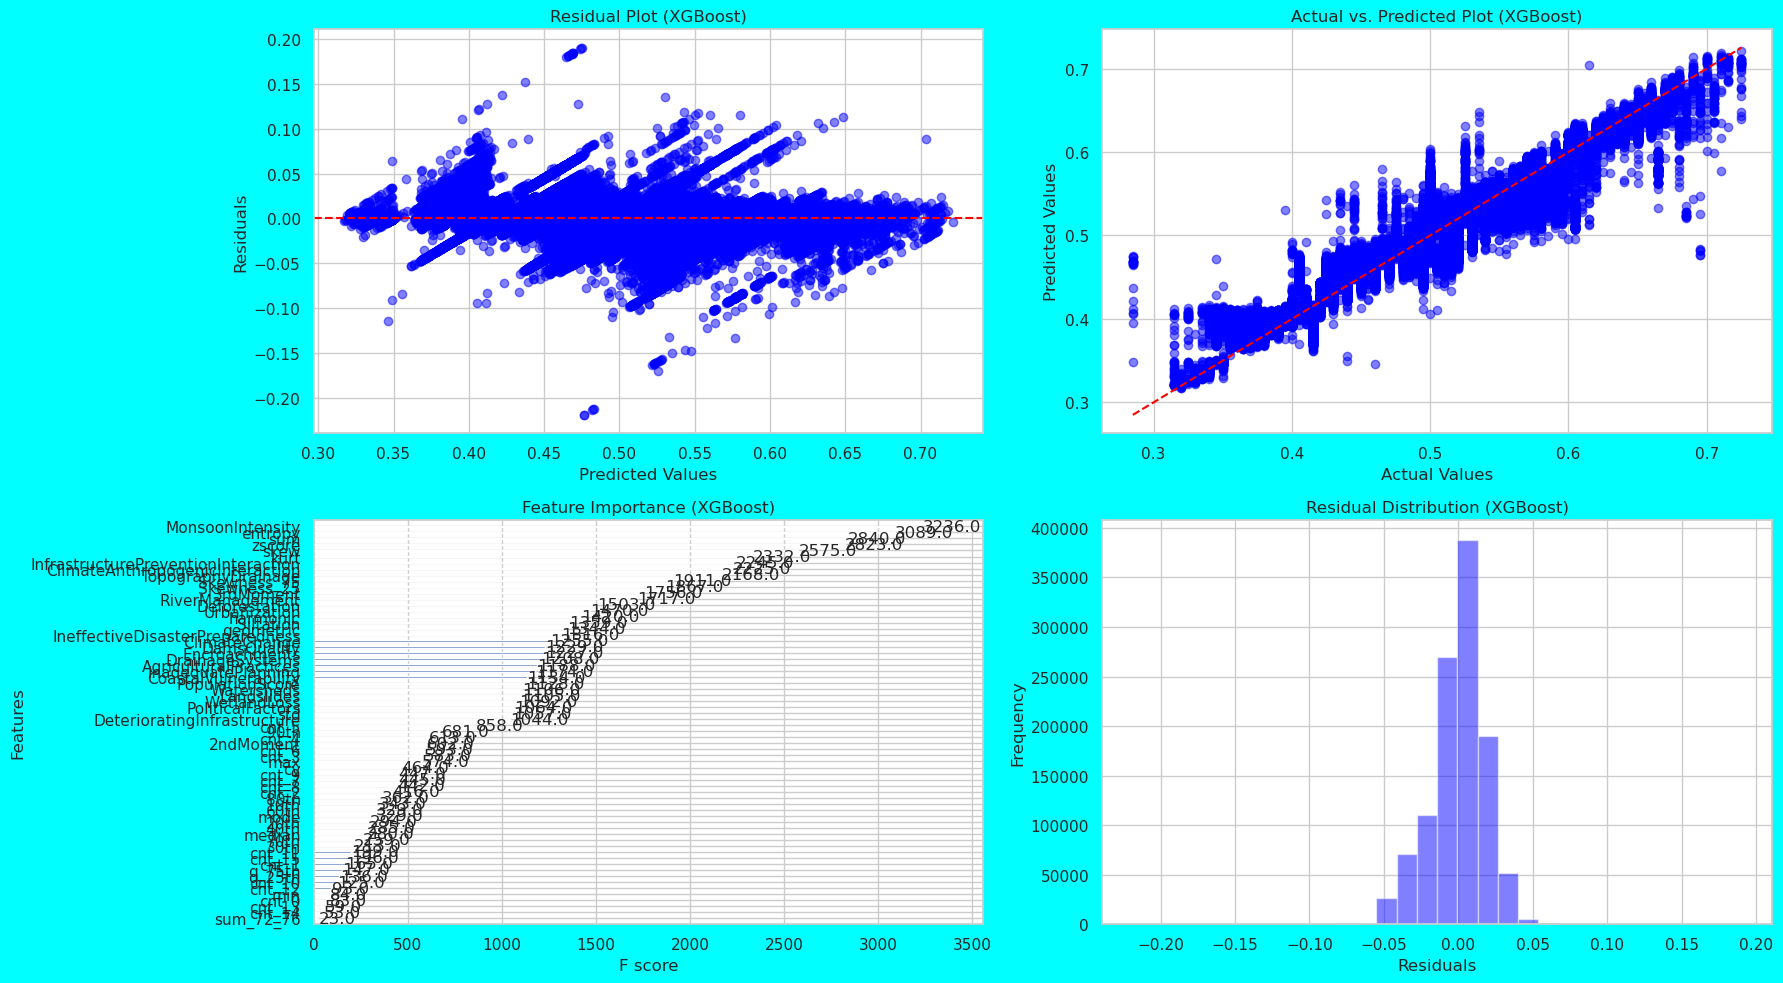

In [ ]:
from xgboost import plot_importance

xgb_residuals = xgb_predictions - xgb_true_labels
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))


axes[0, 0].scatter(xgb_predictions, xgb_residuals, color='blue', alpha=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_title('Residual Plot (XGBoost)')
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].grid(True)

axes[0, 1].scatter(xgb_true_labels, xgb_predictions, color='blue', alpha=0.5)
axes[0, 1].plot([min(xgb_true_labels), max(xgb_true_labels)], [min(xgb_true_labels), max(xgb_true_labels)], color='red', linestyle='--')
axes[0, 1].set_title('Actual vs. Predicted Plot (XGBoost)')
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].grid(True)


plot_importance(xgb_model, ax=axes[1, 0])
axes[1, 0].set_title('Feature Importance (XGBoost)')


axes[1, 1].hist(xgb_residuals, bins=30, color='blue', alpha=0.5)
axes[1, 1].set_title('Residual Distribution (XGBoost)')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True)

plt.gcf().set_facecolor('cyan')
plt.tight_layout()
plt.show()


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold


n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
catboost_params ={
             'random_state':42,
             'learning_rate': 0.011277016304363601,
             'depth': 8,
             'subsample': 0.8675506657380021,
             'colsample_bylevel': 0.7183884158632279,
             'min_data_in_leaf': 98
            }
catboost_predictions = np.zeros(len(scaled_train_data))
catboost_true_labels = np.zeros(len(scaled_train_data))
catboost_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(kf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    catboost_model = CatBoostRegressor(**catboost_params)

    catboost_model.fit(X_train, y_train,
                       eval_set=(X_val, y_val),
                       early_stopping_rounds=10)

    catboost_fold_preds = catboost_model.predict(X_val)

    catboost_fold_test_preds = catboost_model.predict(scaled_test_data)

    catboost_predictions[val_idx] = catboost_fold_preds
    catboost_true_labels[val_idx] = y_val
    catboost_test_predictions += catboost_fold_test_preds / n_splits

overall_metric_catboost = r2_score(catboost_true_labels, catboost_predictions)
print("Overall R^2 (CatBoostRegressor):", overall_metric_catboost)


0:	learn: 0.0505534	test: 0.0505001	best: 0.0505001 (0)	total: 430ms	remaining: 7m 9s
1:	learn: 0.0500788	test: 0.0500258	best: 0.0500258 (1)	total: 784ms	remaining: 6m 31s
2:	learn: 0.0496066	test: 0.0495538	best: 0.0495538 (2)	total: 1.12s	remaining: 6m 12s
3:	learn: 0.0491411	test: 0.0490885	best: 0.0490885 (3)	total: 1.46s	remaining: 6m 3s
4:	learn: 0.0486850	test: 0.0486328	best: 0.0486328 (4)	total: 1.79s	remaining: 5m 56s
5:	learn: 0.0482324	test: 0.0481804	best: 0.0481804 (5)	total: 2.14s	remaining: 5m 54s
6:	learn: 0.0477819	test: 0.0477301	best: 0.0477301 (6)	total: 2.47s	remaining: 5m 50s
7:	learn: 0.0473383	test: 0.0472864	best: 0.0472864 (7)	total: 2.83s	remaining: 5m 51s
8:	learn: 0.0468993	test: 0.0468479	best: 0.0468479 (8)	total: 3.19s	remaining: 5m 50s
9:	learn: 0.0464669	test: 0.0464158	best: 0.0464158 (9)	total: 3.53s	remaining: 5m 49s
10:	learn: 0.0460418	test: 0.0459907	best: 0.0459907 (10)	total: 3.87s	remaining: 5m 47s
11:	learn: 0.0456237	test: 0.0455728	best: 

from sklearn.linear_model import LinearRegression
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

linear_predictions = np.zeros(len(scaled_train_data))
linear_true_labels = np.zeros(len(scaled_train_data))
linear_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(kf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)   
    linear_fold_preds = linear_model.predict(X_val)  
   
    linear_fold_test_preds = linear_model.predict(scaled_test_data)  
   
    linear_predictions[val_idx] = linear_fold_preds
    linear_true_labels[val_idx] = y_val
    linear_test_predictions += linear_fold_test_preds / n_splits  

overall_metric_linear = r2_score(linear_true_labels, linear_predictions)
print("Overall R^2 (Linear Regression):", overall_metric_linear)


<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Plots from results for catboost♒🌊</h1>  
     
</div>

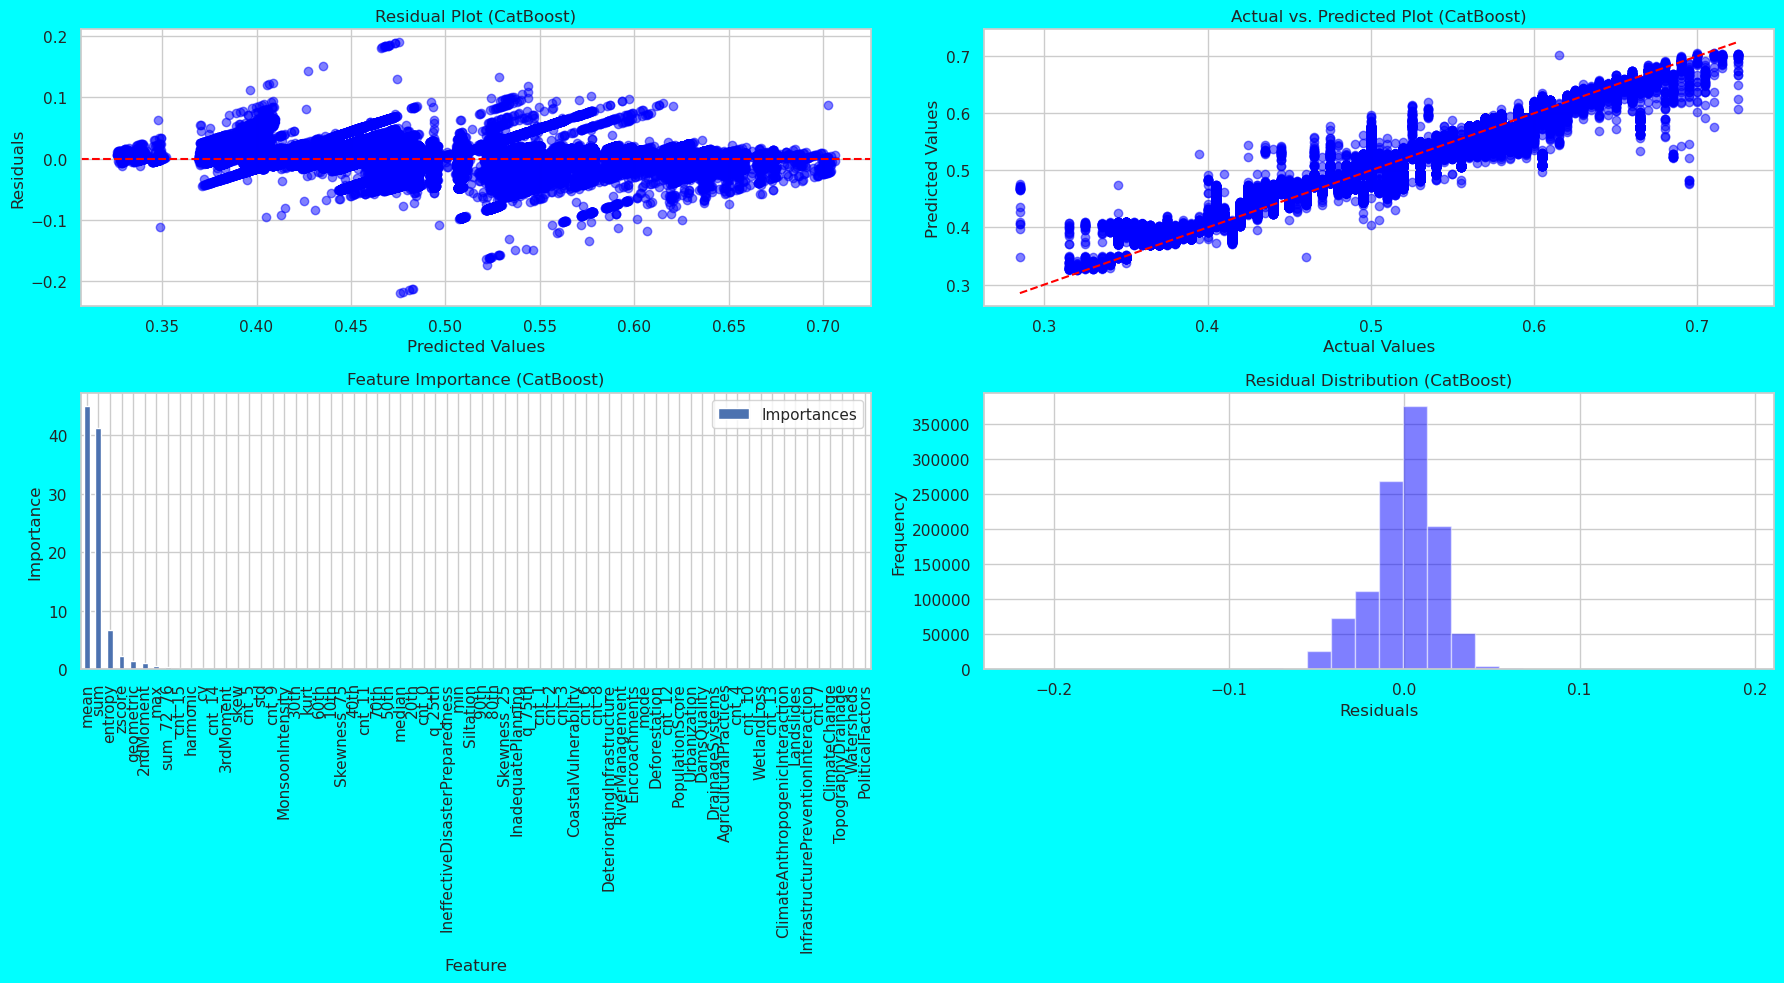

In [ ]:
catboost_residuals = catboost_predictions - catboost_true_labels
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))


axes[0, 0].scatter(catboost_predictions, catboost_residuals, color='blue', alpha=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_title('Residual Plot (CatBoost)')
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].grid(True)


axes[0, 1].scatter(catboost_true_labels, catboost_predictions, color='blue', alpha=0.5)
axes[0, 1].plot([min(catboost_true_labels), max(catboost_true_labels)], [min(catboost_true_labels), max(catboost_true_labels)], color='red', linestyle='--')
axes[0, 1].set_title('Actual vs. Predicted Plot (CatBoost)')
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].grid(True)


catboost_model.get_feature_importance(prettified=True).plot(kind='bar', x='Feature Id', y='Importances', ax=axes[1, 0])
axes[1, 0].set_title('Feature Importance (CatBoost)')
axes[1, 0].set_xlabel('Feature')
axes[1, 0].set_ylabel('Importance')


axes[1, 1].hist(catboost_residuals, bins=30, color='blue', alpha=0.5)
axes[1, 1].set_title('Residual Distribution (CatBoost)')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True)
plt.gcf().set_facecolor('cyan')
plt.tight_layout()
plt.show()


In [ ]:
from lightgbm import LGBMRegressor

n_splits =5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Parametere derived from here https://www.kaggle.com/code/thiagomantuani/ps4e5-flood-prediction-get-started
# One can get this using optuna, gris, random or baysein technique as well which will take time
#https://www.kaggle.com/code/harshitstark/regression-with-a-flood-prediction-dataset/notebook

lgb_params = {
    'boosting_type': 'gbdt',
    'n_estimators':1500,
    'learning_rate' :  0.012,
    'num_leaves' : 250,
    'subsample_for_bin': 165700,
    'min_child_samples': 114,
    'reg_alpha': 2.075e-06,
    'reg_lambda': 3.839e-07,
    'colsample_bytree': 0.9634,
    'subsample': 0.9592,
    'max_depth': 10,
    'random_state':0,
    'verbosity':-1}

lgbm_predictions = np.zeros(len(scaled_train_data))
lgbm_true_labels = np.zeros(len(scaled_train_data))
lgbm_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(kf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    lgbm_model = LGBMRegressor(**lgb_params)

    lgbm_model.fit(X_train, y_train,
                   eval_set=[(X_val, y_val)],
                   eval_metric='rmse',
                   early_stopping_rounds=10,
                   verbose=False)

    lgbm_fold_preds = lgbm_model.predict(X_val)
    lgbm_fold_test_preds = lgbm_model.predict(scaled_test_data)

    lgbm_predictions[val_idx] = lgbm_fold_preds
    lgbm_true_labels[val_idx] = y_val
    lgbm_test_predictions += lgbm_fold_test_preds / n_splits

overall_metric_lgbm = r2_score(lgbm_true_labels, lgbm_predictions)
print("Overall R^2 (LGBMRegressor):", overall_metric_lgbm)


/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is depre

Overall R^2 (LGBMRegressor): 0.869301692625235


<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Plots from results for lightgbm♒🌊</h1>  
     
</div>

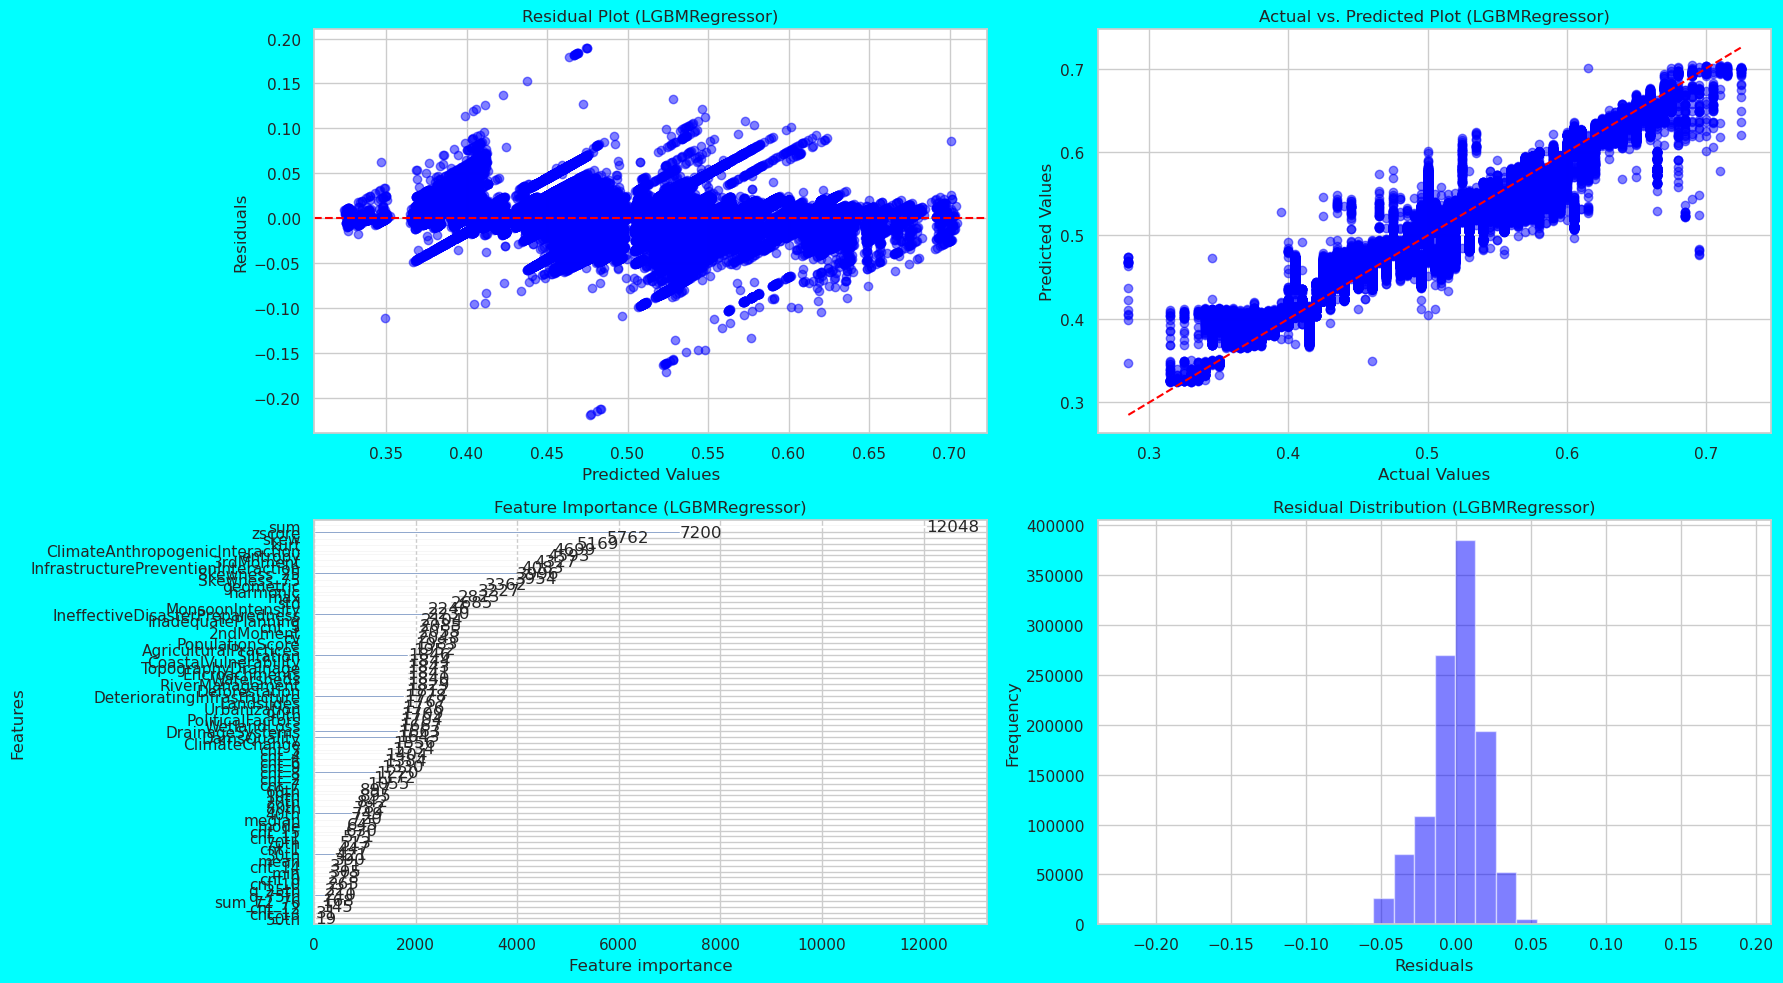

In [ ]:
from lightgbm import plot_importance

lgbm_residuals = lgbm_predictions - lgbm_true_labels
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

axes[0, 0].scatter(lgbm_predictions, lgbm_residuals, color='blue', alpha=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_title('Residual Plot (LGBMRegressor)')
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].grid(True)


axes[0, 1].scatter(lgbm_true_labels, lgbm_predictions, color='blue', alpha=0.5)
axes[0, 1].plot([min(lgbm_true_labels), max(lgbm_true_labels)], [min(lgbm_true_labels), max(lgbm_true_labels)], color='red', linestyle='--')
axes[0, 1].set_title('Actual vs. Predicted Plot (LGBMRegressor)')
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].grid(True)

plot_importance(lgbm_model, ax=axes[1, 0], figsize=(10, 6))
axes[1, 0].set_title('Feature Importance (LGBMRegressor)')

axes[1, 1].hist(lgbm_residuals, bins=30, color='blue', alpha=0.5)
axes[1, 1].set_title('Residual Distribution (LGBMRegressor)')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True)
plt.gcf().set_facecolor('#00FFFF')
plt.tight_layout()
plt.show()

![1_c2f2jWXwMEtBCCchFZZwTQ.png](attachment:ba48bedf-4ae2-4cf8-aaa2-09a25a2151dc.png)

In [ ]:
df_sub.head()

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5


<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">⚒🌊How well The prediction fit♒🌊</h1>  
     
</div>

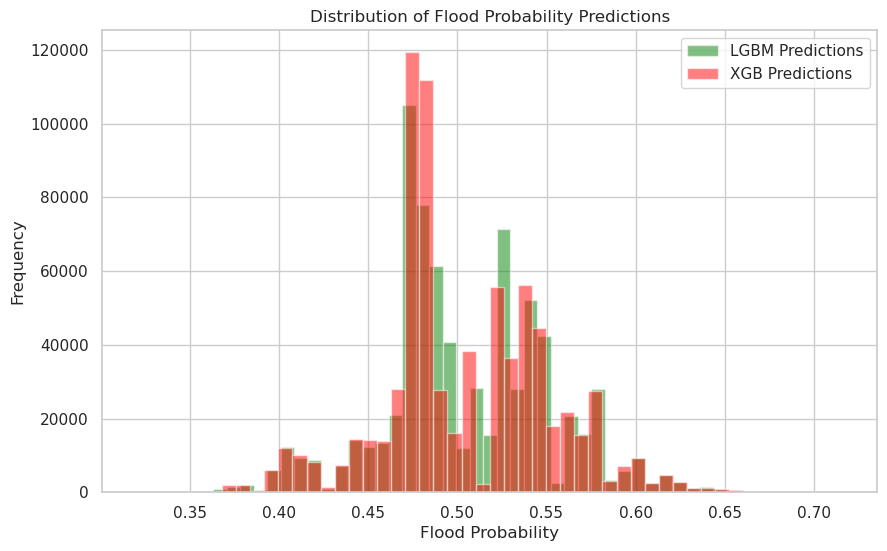

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(lgbm_test_predictions, bins=50, alpha=0.5, color='green', label='LGBM Predictions')
plt.hist(xgb_test_predictions, bins=50, alpha=0.5, color='red', label='XGB Predictions')
plt.xlabel('Flood Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Flood Probability Predictions')
plt.legend()
plt.show()

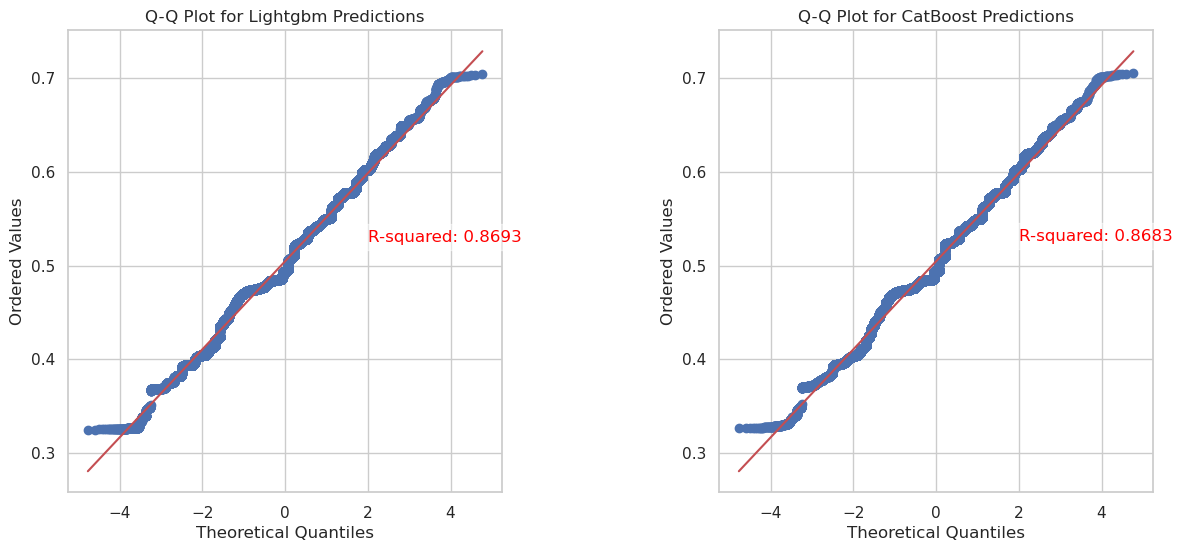

In [ ]:
import scipy.stats as stats

r2_linear =overall_metric_lgbm
r2_catboost = overall_metric_catboost
lgbm_test_predictions = lgbm_test_predictions
catboost_test_predictions = catboost_test_predictions

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
stats.probplot(lgbm_test_predictions, dist="norm", plot=plt)
plt.title('Q-Q Plot for Lightgbm Predictions')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.text(2, np.min(lgbm_test_predictions) + 0.2, f'R-squared: {r2_linear:.4f}', fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.5))


plt.subplot(1, 2, 2)
stats.probplot(catboost_test_predictions, dist="norm", plot=plt)
plt.title('Q-Q Plot for CatBoost Predictions')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.text(2, np.min(catboost_test_predictions) + 0.2, f'R-squared: {r2_catboost:.4f}', fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.5))

plt.subplots_adjust(wspace=0.5)
plt.show()

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🗞📜Final Submission♒🌊</h1>  
     
</div>

In [ ]:
df_sub['FloodProbability'] = lgbm_test_predictions *0.7 + (catboost_test_predictions*0.0 + xgb_test_predictions*0.3)

In [ ]:
df_sub.head()

,id,FloodProbability
0,1117957,0.578263
1,1117958,0.456481
2,1117959,0.447324
3,1117960,0.466408
4,1117961,0.467021


In [ ]:
df_sub.to_csv('submission.csv', index=False)

<Axes: >

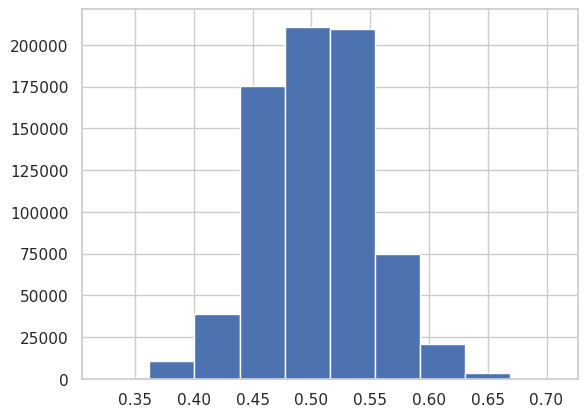

In [ ]:
df_sub['FloodProbability'].hist()

<div class="alert alert-success">
        <h1 align="center" style="color:chocolate;">Looking Forward for feeback </h1>  
     
</div>